<img align=center src="https://rhyme.com/assets/img/logo-dark.png"></img>
<h2 align=center> Multilayer Perceptron Models with Keras</h2>

## Task 1: Project Overview and Import Modules

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.preprocessing.text import Tokenizer

print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.8.2


## Task 2: Load the Reuters Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=30000, test_split=0.2)

In [3]:
print(f"Train-Test Split Ratio: {len(x_train)/len(x_test)}")

Train-Test Split Ratio: 3.9991095280498663


In [4]:
num_classes = np.max(y_train) + 1
print(f"Number of classes = {num_classes}")

Number of classes = 46


## Task 3: Vectorize Sequence Data and One-hot Encode Class Labels

In [5]:
tokenizer = Tokenizer(num_words=30000)
x_train = tokenizer.sequences_to_matrix(x_train, mode="binary")
x_test = tokenizer.sequences_to_matrix(x_test, mode="binary")
x_train.shape, x_test.shape

((8982, 30000), (2246, 30000))

In [6]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)  
y_train.shape, y_test.shape

((8982, 46), (2246, 46))

## Task 4: Build Multilayer Perceptron Model

In [25]:
model = Sequential([
      Dense(512, input_shape=(30000, )),
      Activation('relu'),
      Dropout(0.4),
      Dense(1024),
      Activation('relu'),
      Dropout(0.2),
      Dense(num_classes),
      Activation('softmax'),
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               15360512  
                                                                 
 activation_2 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 1024)              525312    
                                                                 
 activation_3 (Activation)   (None, 1024)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_4 (Dense)             (None, 46)               

## Task 5: Train Model

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor="val_loss", patience=10, verbose=1, mode="min")
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [27]:
history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_split=0.1, callbacks=[es])

Epoch 1/100
127/127 [==============================] - 8s 54ms/step - loss: 3.1842 - accuracy: 0.3376 - val_loss: 2.4680 - val_accuracy: 0.3504
Epoch 2/100
127/127 [==============================] - 4s 35ms/step - loss: 2.1713 - accuracy: 0.4722 - val_loss: 2.0103 - val_accuracy: 0.5050
Epoch 3/100
127/127 [==============================] - 4s 35ms/step - loss: 1.8934 - accuracy: 0.5178 - val_loss: 1.8377 - val_accuracy: 0.5261
Epoch 4/100
127/127 [==============================] - 4s 35ms/step - loss: 1.7652 - accuracy: 0.5554 - val_loss: 1.7339 - val_accuracy: 0.5740
Epoch 5/100
127/127 [==============================] - 5s 36ms/step - loss: 1.6730 - accuracy: 0.5964 - val_loss: 1.6639 - val_accuracy: 0.6307
Epoch 6/100
127/127 [==============================] - 4s 35ms/step - loss: 1.6007 - accuracy: 0.6256 - val_loss: 1.6090 - val_accuracy: 0.6463
Epoch 7/100
127/127 [==============================] - 5s 35ms/step - loss: 1.5385 - accuracy: 0.6478 - val_loss: 1.5635 - val_accuracy:

## Task 6: Evaluate Model on Test Data

In [28]:
model.evaluate(x_test, y_test, batch_size=64, verbose=1)

36/36 [==============================] - 1s 19ms/step - loss: 0.9627 - accuracy: 0.7885


[0.9626710414886475, 0.7885128855705261]

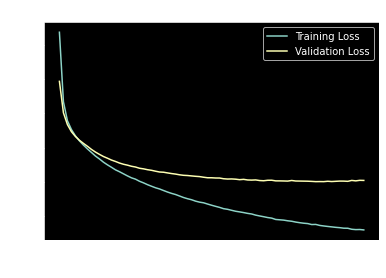

In [29]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

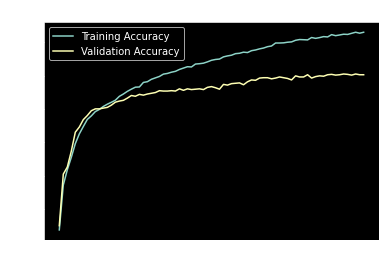

In [30]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()